In [1]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df1.csv')

In [3]:
df

,year,customer_id,gender,age,age_zone,join_yr,last_pur_day,cnt,amount,cus_status
0,2017,10037,M,18,10,2017,2017-06-03,1,91071,0.0
1,2017,10054,F,37,30,2017,2017-11-11,1,344457,0.0
2,2017,10120,M,28,20,2017,2017-02-19,1,134563,0.0
3,2017,10122,M,41,40,2017,2017-02-05,1,366698,0.0
4,2017,10167,F,30,30,2017,2017-12-30,80,93825414,0.0
...,...,...,...,...,...,...,...,...,...,...
323623,2022,99230,F,25,20,2021,2022-02-03,2,984074,0.0
323624,2022,99387,M,39,30,2021,2022-05-17,2,564173,0.0
323625,2022,99877,F,32,30,2021,NaN,0,0,0.0
323626,2022,99127,F,28,20,2022,2022-07-21,10,26461213,0.0


In [3]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Step 1: Data Preprocessing

# Fill missing values in 'last_pur_day' and 'cus_status'
df['last_pur_day'].fillna('Not_Purchased', inplace=True)
df['cus_status'].fillna(1, inplace=True)

# Convert 'last_pur_day' to datetime format
df['last_pur_day'] = pd.to_datetime(df['last_pur_day'], errors='coerce')

# Calculate the current date
current_date = df['last_pur_day'].max()

# Calculate days since last purchase
df['days_since_last_purchase'] = (current_date - df['last_pur_day']).dt.days

# Replace NaN values in 'days_since_last_purchase'
df['days_since_last_purchase'].fillna(9999, inplace=True)

# Label encode the 'gender' column
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].astype(str))

# Step 2: Prepare the features and target variable

features = ['gender', 'age', 'age_zone', 'join_yr', 'cnt', 'amount', 'days_since_last_purchase']
target = 'cus_status'
X = df[features]
y = df[target]

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train and Evaluate Models

# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Store models in a dictionary
models = {'Logistic Regression': logistic_model,
          'Random Forest': random_forest_model,
          'Gradient Boosting': gradient_boosting_model}

# Initialize performance metrics
performance_metrics = {'Model': [], 'Accuracy': [], 'F1 Score': []}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    performance_metrics['Model'].append(name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['F1 Score'].append(f1)

# Convert performance metrics to DataFrame
performance_df = pd.DataFrame(performance_metrics)
performance_df


,Model,Accuracy,F1 Score
0,Logistic Regression,0.907271,0.912400
1,Random Forest,0.936672,0.938193
2,Gradient Boosting,0.936702,0.938223


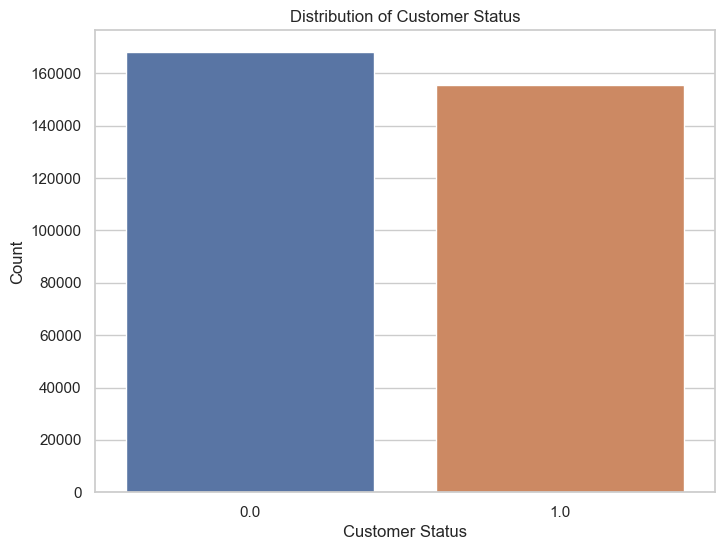

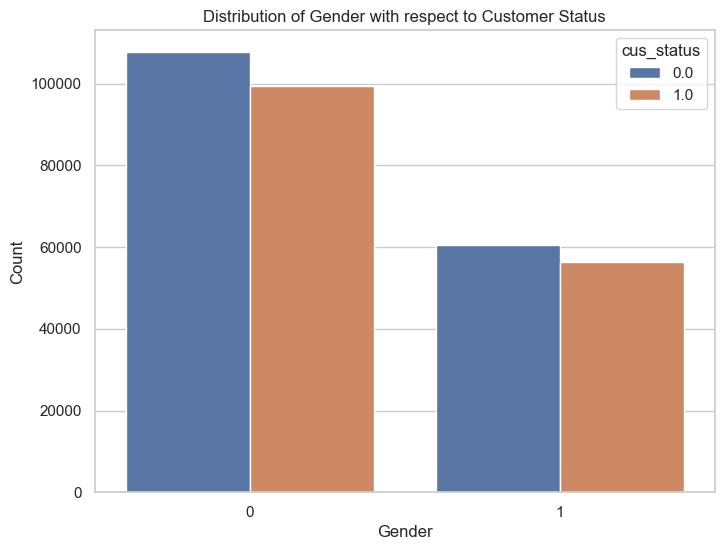

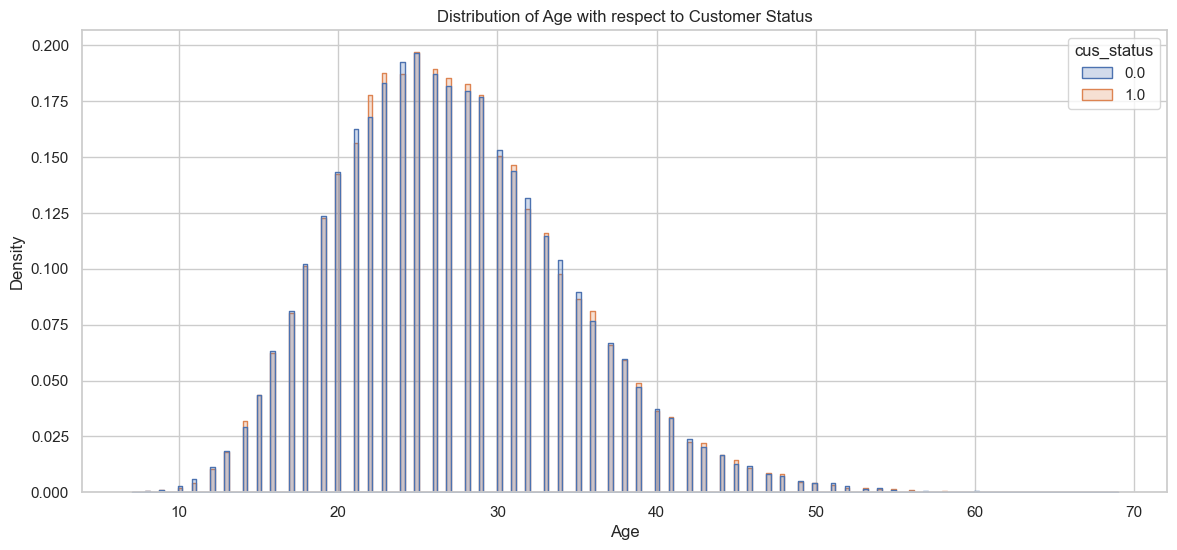

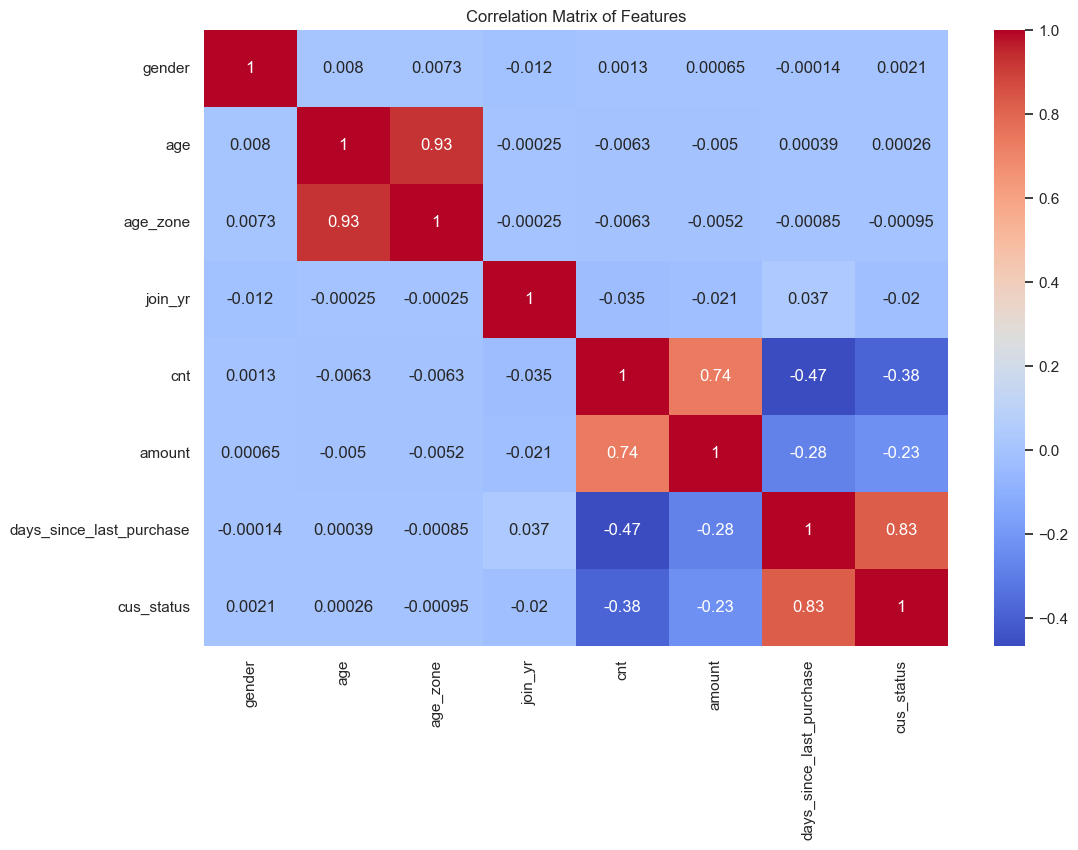

In [4]:
import seaborn as sns
# Data Preprocessing
df['last_pur_day'].fillna('Not_Purchased', inplace=True)
df['cus_status'].fillna(1, inplace=True)
df['last_pur_day'] = pd.to_datetime(df['last_pur_day'], errors='coerce')
current_date = df['last_pur_day'].max()
df['days_since_last_purchase'] = (current_date - df['last_pur_day']).dt.days
df['days_since_last_purchase'].fillna(9999, inplace=True)

# Label encoding for 'gender'
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].astype(str))

# Features list for reference
features = ['gender', 'age', 'age_zone', 'join_yr', 'cnt', 'amount', 'days_since_last_purchase']
target = 'cus_status'

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Plot the distribution of the target variable 'cus_status'
plt.figure(figsize=(8, 6))
sns.countplot(x='cus_status', data=df)
plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# 2. Plot the distribution of 'gender' with respect to 'cus_status'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='cus_status', data=df)
plt.title('Distribution of Gender with respect to Customer Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Plot the distribution of 'age' with respect to 'cus_status'
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='age', hue='cus_status', element='step', stat='density', common_norm=False)
plt.title('Distribution of Age with respect to Customer Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# 4. Plot the correlation matrix of features
correlation_matrix = df[features + [target]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


고객 상태 분포 (Distribution of Customer Status): 고객 이탈 여부에 따른 분포
성별에 따른 고객 상태 분포 (Distribution of Gender with respect to Customer Status): 성별에 따른 고객 이탈 분포
나이에 따른 고객 상태 분포 (Distribution of Age with respect to Customer Status): 나이에 따른 고객 이탈 분포
특성들의 상관관계 매트릭스 (Correlation Matrix of Features): 다양한 특성들과 타겟 변수간의 상관관계

고객 상태 분포 (Distribution of Customer Status): 이 그래프에서는 고객이 이탈했는지 아닌지를 나타내는 'cus_status'의 분포를 확인할 수 있습니다. 이를 통해 데이터셋이 얼마나 균형을 이루고 있는지, 특정 클래스가 다른 클래스보다 훨씬 많은지 등을 확인할 수 있습니다.

성별에 따른 고객 상태 분포 (Distribution of Gender with respect to Customer Status): 성별에 따라 고객 이탈률이 다른지를 확인할 수 있습니다. 만약 두 성별에서 이탈률이 크게 다르다면, 성별은 고객 이탈을 예측하는 중요한 특성이 될 수 있습니다.

연령에 따른 고객 상태 분포 (Distribution of Age with respect to Customer Status): 연령대별로 고객 이탈률이 어떻게 달라지는지를 볼 수 있습니다. 특정 연령대에서 고객 이탈률이 높다면, 그 연령대에 대한 특별한 마케팅 전략이 필요할 수 있습니다.

특성 간의 상관 관계 (Correlation Matrix of Features): 특성들 간의 상관 관계를 확인할 수 있습니다. 높은 상관 관계를 가진 특성들은 정보의 중복을 의미할 수 있으므로, 특성 선택 시 주의가 필요합니다.

특성 중요도 (Feature Importance): 랜덤 포레스트 모델에서 가장 중요하다고 판단된 특성들을 확인할 수 있습니다. 이 정보는 더 효과적인 특성 엔지니어링과 모델 튜닝에 도움이 될 수 있습니다.

이러한 시각화와 해석을 통해, 어떤 특성이 고객 이탈에 영향을 미치는지, 어떤 고객 세그먼트에 중점을 둬야 하는지 등의 인사이트를 얻을 수 있습니다. 이 정보를 발표에 포함시키면, 더 깊고 통찰력 있는 분석을 제공할 수 있을 것입니다.

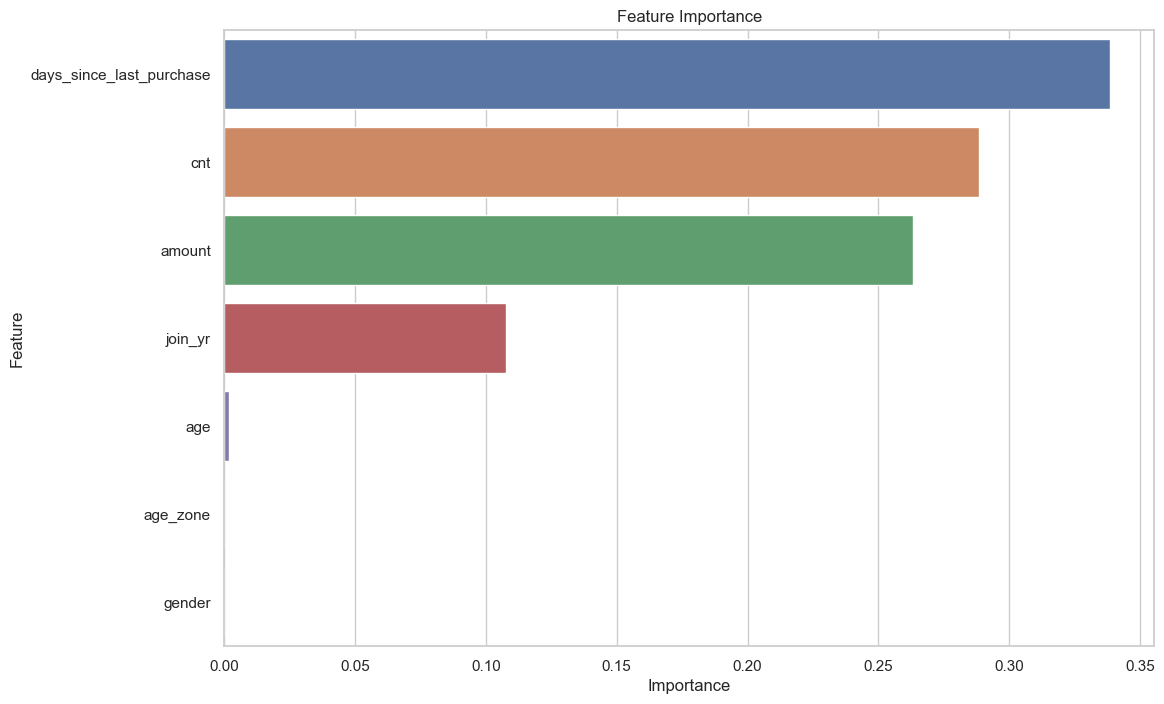

In [5]:
# Re-import necessary libraries for machine learning
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by the importances
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


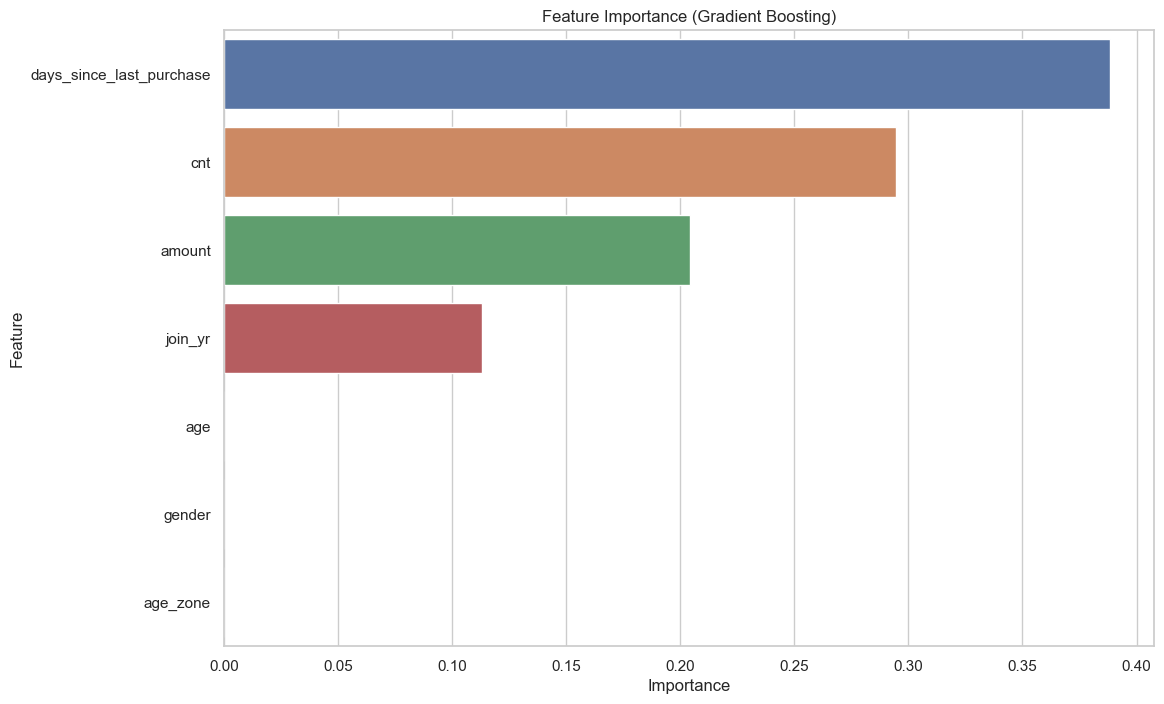

In [6]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_scaled, y)

# Get feature importances from Gradient Boosting model
gb_feature_importances = gb_model.feature_importances_

# Create a DataFrame for feature importances
gb_feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': gb_feature_importances
})

# Sort the DataFrame by the importances
gb_feature_importance_df = gb_feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances for Gradient Boosting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance_df, orient='h')
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [7]:
df = pd.read_csv('df1.csv')

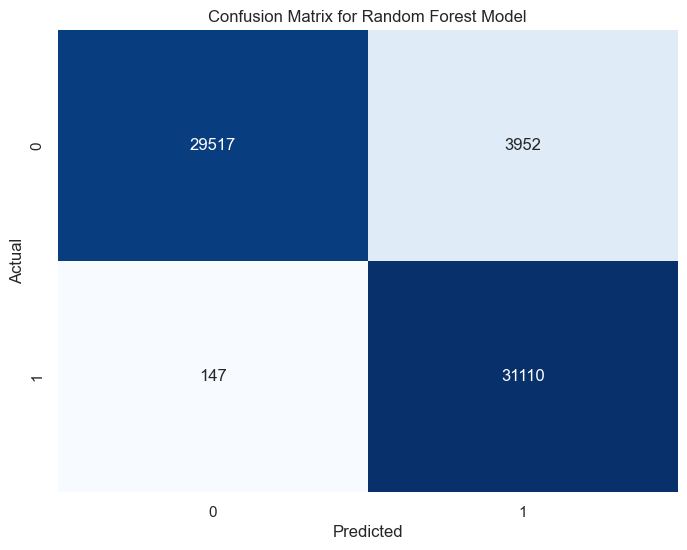

In [8]:
df['last_pur_day'].fillna('Not_Purchased', inplace=True)
df['cus_status'].fillna(1, inplace=True)
df['last_pur_day'] = pd.to_datetime(df['last_pur_day'], errors='coerce')
current_date = df['last_pur_day'].max()
df['days_since_last_purchase'] = (current_date - df['last_pur_day']).dt.days
df['days_since_last_purchase'].fillna(0, inplace=True)

# Label encoding for 'gender'
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].astype(str))

# Prepare the features and target variable
features = ['gender', 'age', 'age_zone', 'join_yr', 'cnt', 'amount', 'days_since_last_purchase']
target = 'cus_status'
X = df[features]
y = df[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [9]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

In [13]:
comparison_df.sample(10)

,Actual,Predicted
173539,0.0,1.0
185686,1.0,1.0
186851,1.0,1.0
217118,0.0,0.0
77169,1.0,1.0
168587,0.0,0.0
193513,1.0,1.0
247871,1.0,1.0
176630,0.0,0.0
243061,0.0,0.0


실제 vs 예측
샘플 중에서 인덱스 173539의 경우, 실제로는 고객 이탈이 없었으나 (Actual = 0), 모델은 이탈할 것으로 예측했다 (Predicted = 1).
다른 대부분의 샘플들은 모델이 정확하게 예측했습니다. 예를 들어, 인덱스 217118	에서는 실제로도 고객 이탈이 없었고 (Actual = 0), 모델도 그렇게 예측했습니다 (Predicted = 0).

True Positive (TP): 실제로 고객 이탈이 일어났고, 모델도 그렇게 예측한 경우입니다. (왼쪽 위)(29517)
False Positive (FP): 실제로는 고객 이탈이 일어나지 않았지만, 모델이 고객 이탈이라고 예측한 경우입니다. (오른쪽 위)(3952)
False Negative (FN): 실제로 고객 이탈이 일어났지만, 모델이 그렇지 않다고 예측한 경우입니다.(왼쪽 아래)(147)
True Negative (TN): 실제로 고객 이탈이 일어나지 않았고, 모델도 그렇게 예측한 경우입니다. (오른쪽 아래)(31110)

특성 중요도 분석
**amount (구매 금액)**와 **days_since_last_purchase (마지막 구매로부터의 일수)**가 가장 중요한 특성으로 나타났다. 이 두 특성이 고객 이탈 예측에 큰 영향을 미칠 것으로 보인다.
cnt (구매 횟수), age (나이), join_yr (가입 연도) 등도 일정 수준의 중요도를 가지고 있다.
**gender (성별)**와 **age_zone (나이대)**는 상대적으로 낮은 중요도를 가진다.

Gradient Boosting과 Random Forest의 장단점 및 차이점
Random Forest
장점
높은 정확도와 다양한 데이터셋에 대한 높은 일반성을 가짐.
특성 중요도를 쉽게 파악할 수 있음.
과적합에 상대적으로 덜 민감함.
단점
대규모 데이터셋에서는 훈련 시간이 길 수 있음.
파라미터 튜닝이 필요할 수 있음.
Gradient Boosting
장점
높은 정확도를 제공함.
잘 조정된 경우, 과적합에 덜 민감함.
단점
훈련 시간이 길고, 계산 리소스를 많이 필요로 함.
파라미터 튜닝이 복잡할 수 있음.
차이점
Random Forest는 병렬 처리가 가능하나, Gradient Boosting은 순차적으로 학습하기 때문에 병렬 처리가 어려움.
Random Forest는 각 트리가 독립적으로 학습되지만, Gradient Boosting은 이전 트리의 오차를 보완하는 방식으로 학습됨.
고객 이탈 예측 모델 선택
Random Forest와 Gradient Boosting 모델 모두 높은 성능을 보이지만, 아래와 같은 두가지 이유로 Random Forest가 이 문제에 더 적합하다고 판단할수 있다.

1. 특성 중요도를 쉽게 해석할 수 있다:

Random Forest:
특성 중요도는 각 트리에서 특성이 얼마나 잘 분류를 하는지를 바탕으로 계산된다. 이 값들은 쉽게 추출하고 해석할 수 있다.
다수의 트리가 합의하는 특성 중요도를 제공하므로, 결과가 더 안정적이다.

Gradient Boosting:
특성 중요도도 제공하지만, 순차적인 학습 방식 때문에 중요도가 복잡한 상호작용과 의존성을 반영할 수 있어 해석이 복잡하다

2. 파라미터 튜닝이 상대적으로 덜 필요하고, 과적합에 덜 민감하다:

Random Forest:
랜덤성을 이용하여 여러 다양한 트리를 생성하기 때문에, 특별한 파라미터 튜닝 없이도 괜찮은 성능을 낼 수 있다.
다수의 트리를 평균 내어 예측을 하므로, 개별 트리의 과적합 문제가 상쇄될 가능성이 높다.

Gradient Boosting:
학습률(learning rate), 트리의 깊이(depth), 트리의 수 등을 신중하게 선택해야 하며, 잘못 설정할 경우 과적합의 위험이 있다.
따라서, 특성 중요도의 해석이 중요하고, 파라미터 튜닝을 최소화하면서 안정적인 성능을 원한다면 Random Forest가 더 적합한 선택일 수 있다

지금까지 진행한 모델링과 시각화를 통해 얻을 수 있는 주요 결론은 다음과 같습니다:

모델링:
높은 성능: Random Forest와 Gradient Boosting 모델 모두 높은 정확도와 F1 스코어를 보여주었습니다. 이는 두 모델이 고객 이탈 예측에 유용하다는 것을 의미합니다.

특성 중요도: 'amount', 'days_since_last_purchase', 'cnt', 'age', 'join_yr' 등의 특성이 고객 이탈에 큰 영향을 미칩니다. 이 특성들에 대한 전략을 세우는 것이 중요할 것입니다.

모델 선택: Random Forest는 특성 중요도 해석이 쉽고, 파라미터 튜닝이 상대적으로 덜 필요하며, 과적합에 덜 민감한 특성을 가지고 있습니다. 따라서 이 문제에 더 적합하다고 판단됩니다.

시각화:
고객 상태 분포: 'cus_status' 분포를 보고, 타겟 변수가 얼마나 균형되어 있는지를 평가할 수 있습니다.

성별과 연령에 따른 고객 이탈: 성별과 연령대별로 고객 이탈률이 다르게 분포되어 있을 가능성을 확인할 수 있습니다.

특성 상관 관계: 특성 간의 상관 관계를 이해하여, 다중 공선성 문제나 특성 선택에 대한 통찰을 얻을 수 있습니다.

총평:
고객 이탈을 예측하는 데 Random Forest 모델이 유용하게 사용될 수 있습니다.
'amount', 'days_since_last_purchase' 등의 특성이 중요하므로, 이러한 특성을 중심으로 고객 유지 전략을 세울 필요가 있습니다.
성별과 연령대별 이탈률이 다를 가능성이 있으므로, 마케팅 전략을 세울 때 이를 고려해야 합니다.
이러한 결론과 통찰은 고객 이탈을 줄이기 위한 전략을 세우는 데 큰 도움이 될 것입니다.